In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
station_data = pd.read_csv('austin_bikeshare_stations.csv')
trip_data = pd.read_csv('austin_bikeshare_trips.csv')


In [3]:
# Drop na() values
trip_data1 = trip_data.dropna()
trip_data1['year'] = trip_data1['year'].apply(lambda x : str(int(x)))

C:\Users\Akhil\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
trip_data1.shape[0]

581625

In [5]:
station_data[:5]

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [14]:
trip_data[:5]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [8]:
# Time period of the data
trip_data.describe()
# trip_data[['month','year']].drop_duplicates().sort_values(by = 'year')

,month,year
317,12.0,2013.0
254,12.0,2014.0
22,9.0,2014.0
41,7.0,2014.0
47,10.0,2014.0
10,3.0,2014.0
28,4.0,2014.0
8,5.0,2014.0
70,8.0,2014.0
88,1.0,2014.0


In [21]:
# Unique values of the factor variables in the data
trip_data.astype('object').describe()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
count,648508.0,649231,649231,629389.0,649231,618479.0,630190.0,649231,649231,647154,649231,618479.0
unique,410.0,65663,1417,71.0,92,12.0,71.0,90,357010,52,649231,5.0
top,951.0,16:12:00,7,2499.0,City Hall / Lavaca & 2nd,3.0,2575.0,Riverside @ S. Lamar,2015-03-19 18:12:00,Walk Up,9900166212,2016.0
freq,2049.0,24707,30092,33125.0,33125,112002.0,28695.0,28695,304,282170,1,184680.0


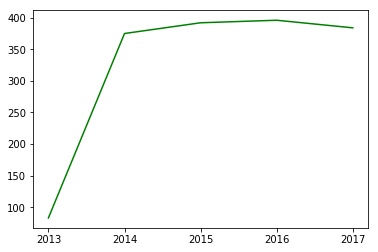

In [90]:
#Total number of bikes for all the years
len(trip_data1['bikeid'].unique())

# Trend in the number of the bikes over time
df = pd.DataFrame(trip_data1[['year','bikeid']].drop_duplicates().groupby('year')['bikeid'].count().reset_index())
plot(df['year'],df['bikeid'],color = 'green',linestyle = '-')
# Need to add labels

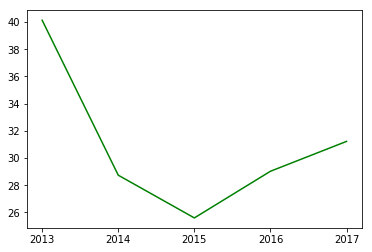

In [94]:
# Average duration over time
duration = pd.DataFrame(trip_data1.groupby('year')['duration_minutes'].mean().reset_index())
plot(duration['year'],duration['duration_minutes'],color = 'green',linestyle = '-')

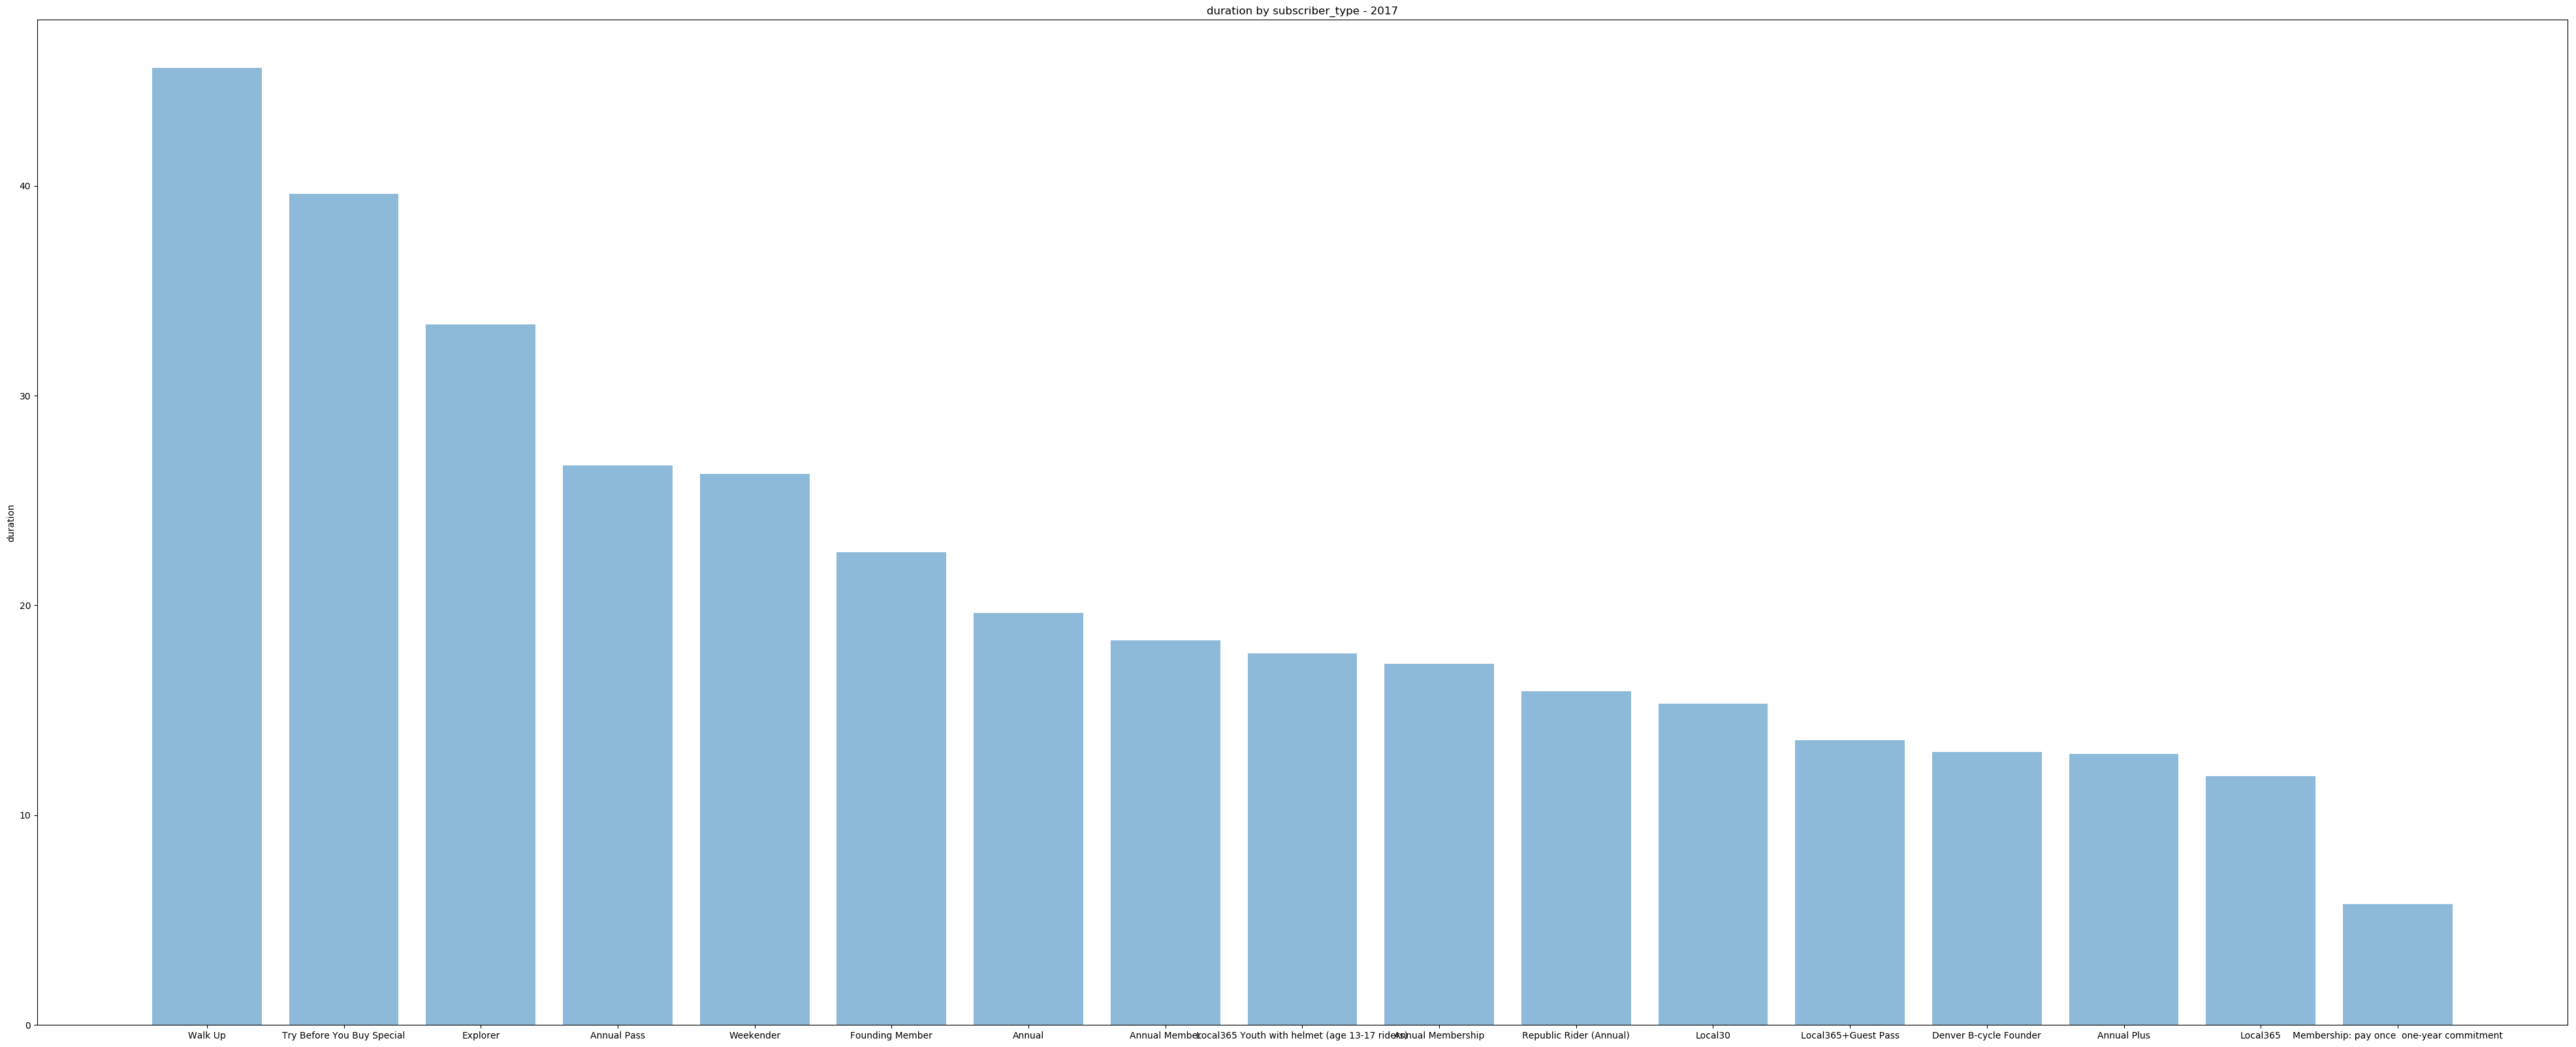

In [128]:
# Average duration by subscriber types in 2017
subs_type = pd.DataFrame(trip_data1[trip_data1['year'] == '2017'].groupby('subscriber_type')['duration_minutes'].mean().reset_index().\
                         sort_values(by = 'duration_minutes',ascending = False))
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 20]
plt.bar(subs_type['subscriber_type'],subs_type['duration_minutes'], align='center', alpha=0.5)
plt.xticks(subs_type['subscriber_type'])
plt.ylabel('duration')
plt.title('duration by subscriber_type - 2017')
plt.rcParams.update({'font.size': 30})

Text(0.5,1,'duration by subscriber type -2017')

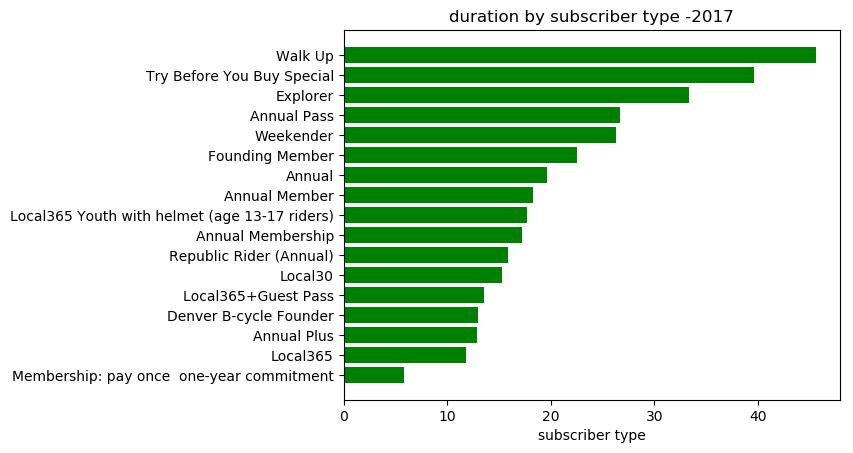

In [130]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(subs_type['subscriber_type'],subs_type['duration_minutes'], align='center',
        color='green', ecolor='black')
ax.set_yticks(subs_type['subscriber_type'])
ax.set_yticklabels(subs_type['subscriber_type'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('subscriber type')
ax.set_title('duration by subscriber type -2017')

In [140]:
#Stations with maximum number of start trips in 2017
data_2017 = trip_data1[trip_data1['year'] == '2017']
pd.DataFrame(data_2017.groupby(['start_station_id','start_station_name'])['trip_id'].count().reset_index()).\
                                                                                    sort_values(by = 'trip_id',ascending= False)

,start_station_id,start_station_name,trip_id
37,2575.0,Riverside @ S. Lamar,4073
26,2563.0,Davis at Rainey Street,3954
38,2707.0,Rainey St @ Cummings,3909
3,2494.0,2nd & Congress,3709
36,2574.0,Zilker Park,3282
8,2499.0,City Hall / Lavaca & 2nd,3186
7,2498.0,Convention Center / 4th St. @ MetroRail,3073
9,2501.0,5th & Bowie,3067
4,2495.0,4th & Congress,3060
15,2539.0,Convention Center / 3rd & Trinity,2609


In [9]:
import folium
folium_map = folium.Map(location=[60.738, -70.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
marker = folium.CircleMarker(location=[60.738, -100.98])
marker.add_to(folium_map)
folium_map.save("my_map.html")
folium_map

In [148]:
# Migration patter of busy stations over a span of one year in 

In [ ]:
# Interactive plots over time during a day